In [1]:
import sagemaker
from sagemaker.predictor import json_serializer, json_deserializer, Predictor
import cv2
import numpy as np
import json
import sys
import matplotlib.pyplot as plt

In [2]:
endpoint_name="pepp-detectron2-2021-09-04-12-01-53-495"
predictor = Predictor(endpoint_name=endpoint_name, sagemaker_session=sagemaker.Session(),serializer=sagemaker.serializers.JSONSerializer(),
    deserializer=sagemaker.deserializers.JSONDeserializer())
#predictor = Predictor(endpoint_name=endpoint_name, sagemaker_session=sagemaker.Session())

In [3]:
image_path="local_test/test_dir/input/data/training/21XZ2418_210715_124212_719242_001.jpg"
img=cv2.imread(image_path)
img=cv2.resize(img,(int(img.shape[1]//2),int(img.shape[0])//2))
if img is None:
    raise("Image cannot be loaded")
img.shape

(768, 1024, 3)

In [2]:
1024*1024

1048576

Text(0.5, 1.0, 'Input Image')

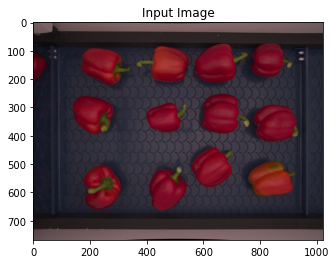

In [4]:
plt.imshow(img[...,::-1])
plt.title("Input Image")

In [5]:
data={"images":img.tolist(),"batch_size":1}

In [6]:
res=predictor.predict(data)

In [7]:
res.keys()

dict_keys(['masks', 'boxes', 'classes'])

In [8]:
def visualize_masks(masks,img):
    """Apply the masks to the image."""
    vis_img=img.copy()
    from random import randint
    for i in range(masks.shape[0]):
        color = [randint(0, 255) for p in range(3)]
        for j in range(3):
            vis_img[:, :,j] = np.where(masks[i] == True,color[j],vis_img[:,:,j])
    return vis_img

In [9]:
detected_masks=visualize_masks(np.array(res["masks"]),img)

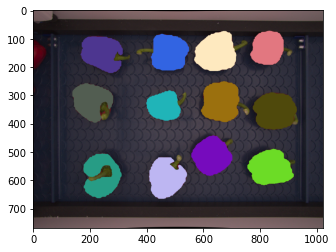

In [10]:
plt.imshow(detected_masks[...,::-1])

In [ ]:
# Pay Load encoding Experiments 

In [ ]:
from base64 import b64encode,b64decode
enc=b64encode(img)
dec=b64decode(enc)
print ("Estimated size of Image pyload is: " + str(sys.getsizeof(img) / 1e6) + "MB")
print ("Estimated size of json encoded pyload is: " + str(sys.getsizeof(enc) / 1e6) + "MB")
print ("Estimated size of json decoded pyload is: " + str(sys.getsizeof(dec) / 1e6) + "MB")

In [ ]:
import base64
import numpy as np
import pickle
import codecs
obj_base64string = codecs.encode(pickle.dumps(data, protocol=pickle.HIGHEST_PROTOCOL), "base64")
obj_reconstituted = pickle.loads(codecs.decode(obj_base64string, "base64"))
print ("Estimated size of encoded pyload is: " + str(sys.getsizeof(obj_base64string) / 1e6) + "MB")

In [ ]:
from base64 import b64encode
class Base64Encoder(json.JSONEncoder):
    # pylint: disable=method-hidden
    def default(self, o):
        if isinstance(o, bytes):
            print(f"Encoding to base64!!")
            return b64encode(o).decode()
        return json.JSONEncoder.default(self, o)
b64en=json.dumps(data, cls=Base64Encoder)
print ("Estimated size of json serialzed pyload is: " + str(sys.getsizeof(b64en) / 1e6) + "MB")

In [ ]:
npserializer=sagemaker.serializers.NumpySerializer(dtype="uint8")
serialized_data=npserializer.serialize(data)
print ("Estimated size of numpy serialzed pyload is: " + str(sys.getsizeof(serialized_data) / 1e6) + "MB")

In [ ]:
jsserializer=sagemaker.serializers.JSONSerializer()
serialized_data=jsserializer.serialize(data)
print ("Estimated size of json serialzed pyload is: " + str(sys.getsizeof(serialized_data) / 1e6) + "MB")